In [1]:
# import the libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense, Activation,Layer,Lambda
import seaborn as sns
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions

In [2]:
df = pd.read_csv("forestfires (1).csv")

In [3]:
df1 = df.copy()

In [4]:
df1

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [5]:
df1.drop(['month','day'],axis=1,inplace = True)

In [6]:
df1['size_category'].value_counts()

small    378
large    139
Name: size_category, dtype: int64

In [7]:
df1.isnull().sum()

FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [8]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
FFMC,517.0,90.644681,5.520111,18.7,90.2,91.60,92.90,96.20
DMC,517.0,110.872340,64.046482,1.1,68.6,108.30,142.40,291.30
DC,517.0,547.940039,248.066192,7.9,437.7,664.20,713.90,860.60
ISI,517.0,9.021663,4.559477,0.0,6.5,8.40,10.80,56.10
temp,517.0,18.889168,5.806625,2.2,15.5,19.30,22.80,33.30
RH,517.0,44.288201,16.317469,15.0,33.0,42.00,53.00,100.00
wind,517.0,4.017602,1.791653,0.4,2.7,4.00,4.90,9.40
rain,517.0,0.021663,0.295959,0.0,0.0,0.00,0.00,6.40
area,517.0,12.847292,63.655818,0.0,0.0,0.52,6.57,1090.84
dayfri,517.0,0.164410,0.371006,0.0,0.0,0.00,0.00,1.00


C:\Users\rajeshwari pilankar\anaconda3\Raj\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


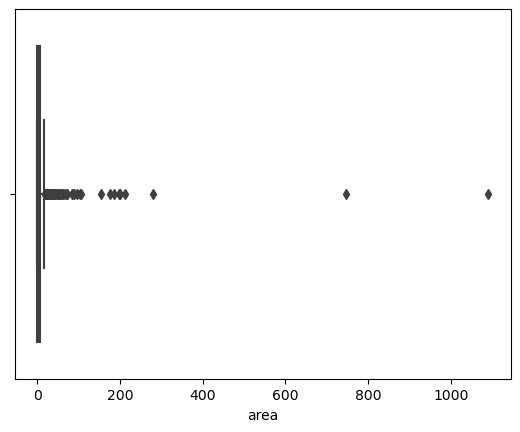

In [9]:
## outlier check
ax = sns.boxplot(df['area'])

In [11]:
plt.rcParams['figure.figsize'] = 9,5

Skew: 12.846933533934868
Kurtosis: 194.1407210942299


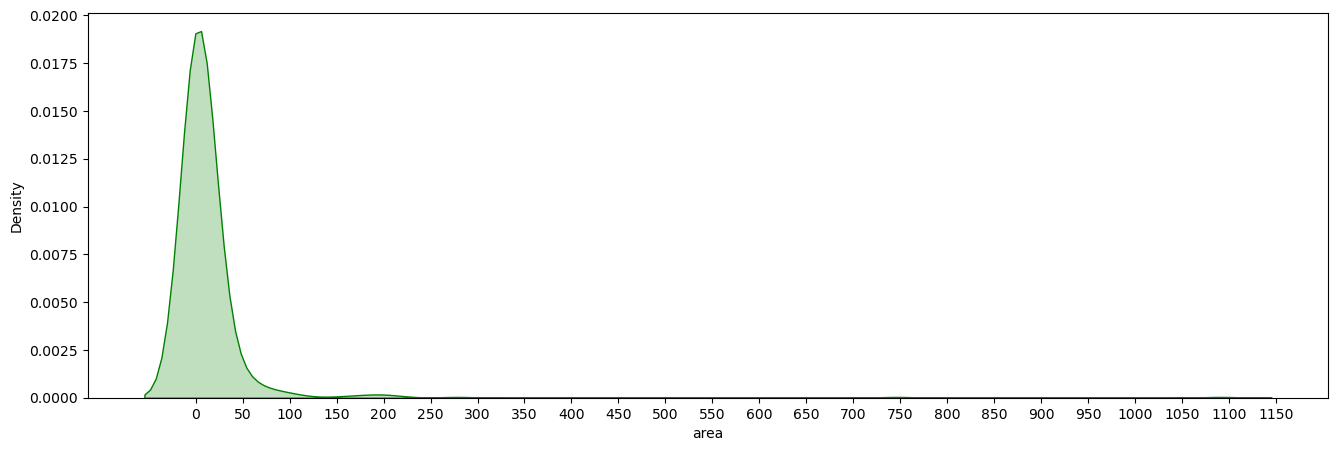

In [13]:
plt.figure(figsize=(16,5))
print("Skew: {}".format(df1['area'].skew()))
print("Kurtosis: {}".format(df1['area'].kurtosis()))
ax = sns.kdeplot(df1['area'],shade=True,color='g')
plt.xticks([i for i in range(0,1200,50)])
plt.show()

In [14]:
dfa = df1[df1.columns[0:10]]
month_colum = dfa.select_dtypes(include = 'object').columns.tolist()

In [15]:
plt.figure(figsize=(16,10))
for i,col in enumerate(month_colum,1):
    plt.subplot(2,2,i)
    sns.countplot(data=dfa,y=col)
    plt.subplot(2,2,i+2)
    df1[col].value_counts(normalize=True).plot.bar()
    plt.ylabel(col)
    plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show() 

<Figure size 1600x1000 with 0 Axes>

In [16]:
num_columns = dfa.select_dtypes(exclude='object').columns.tolist()

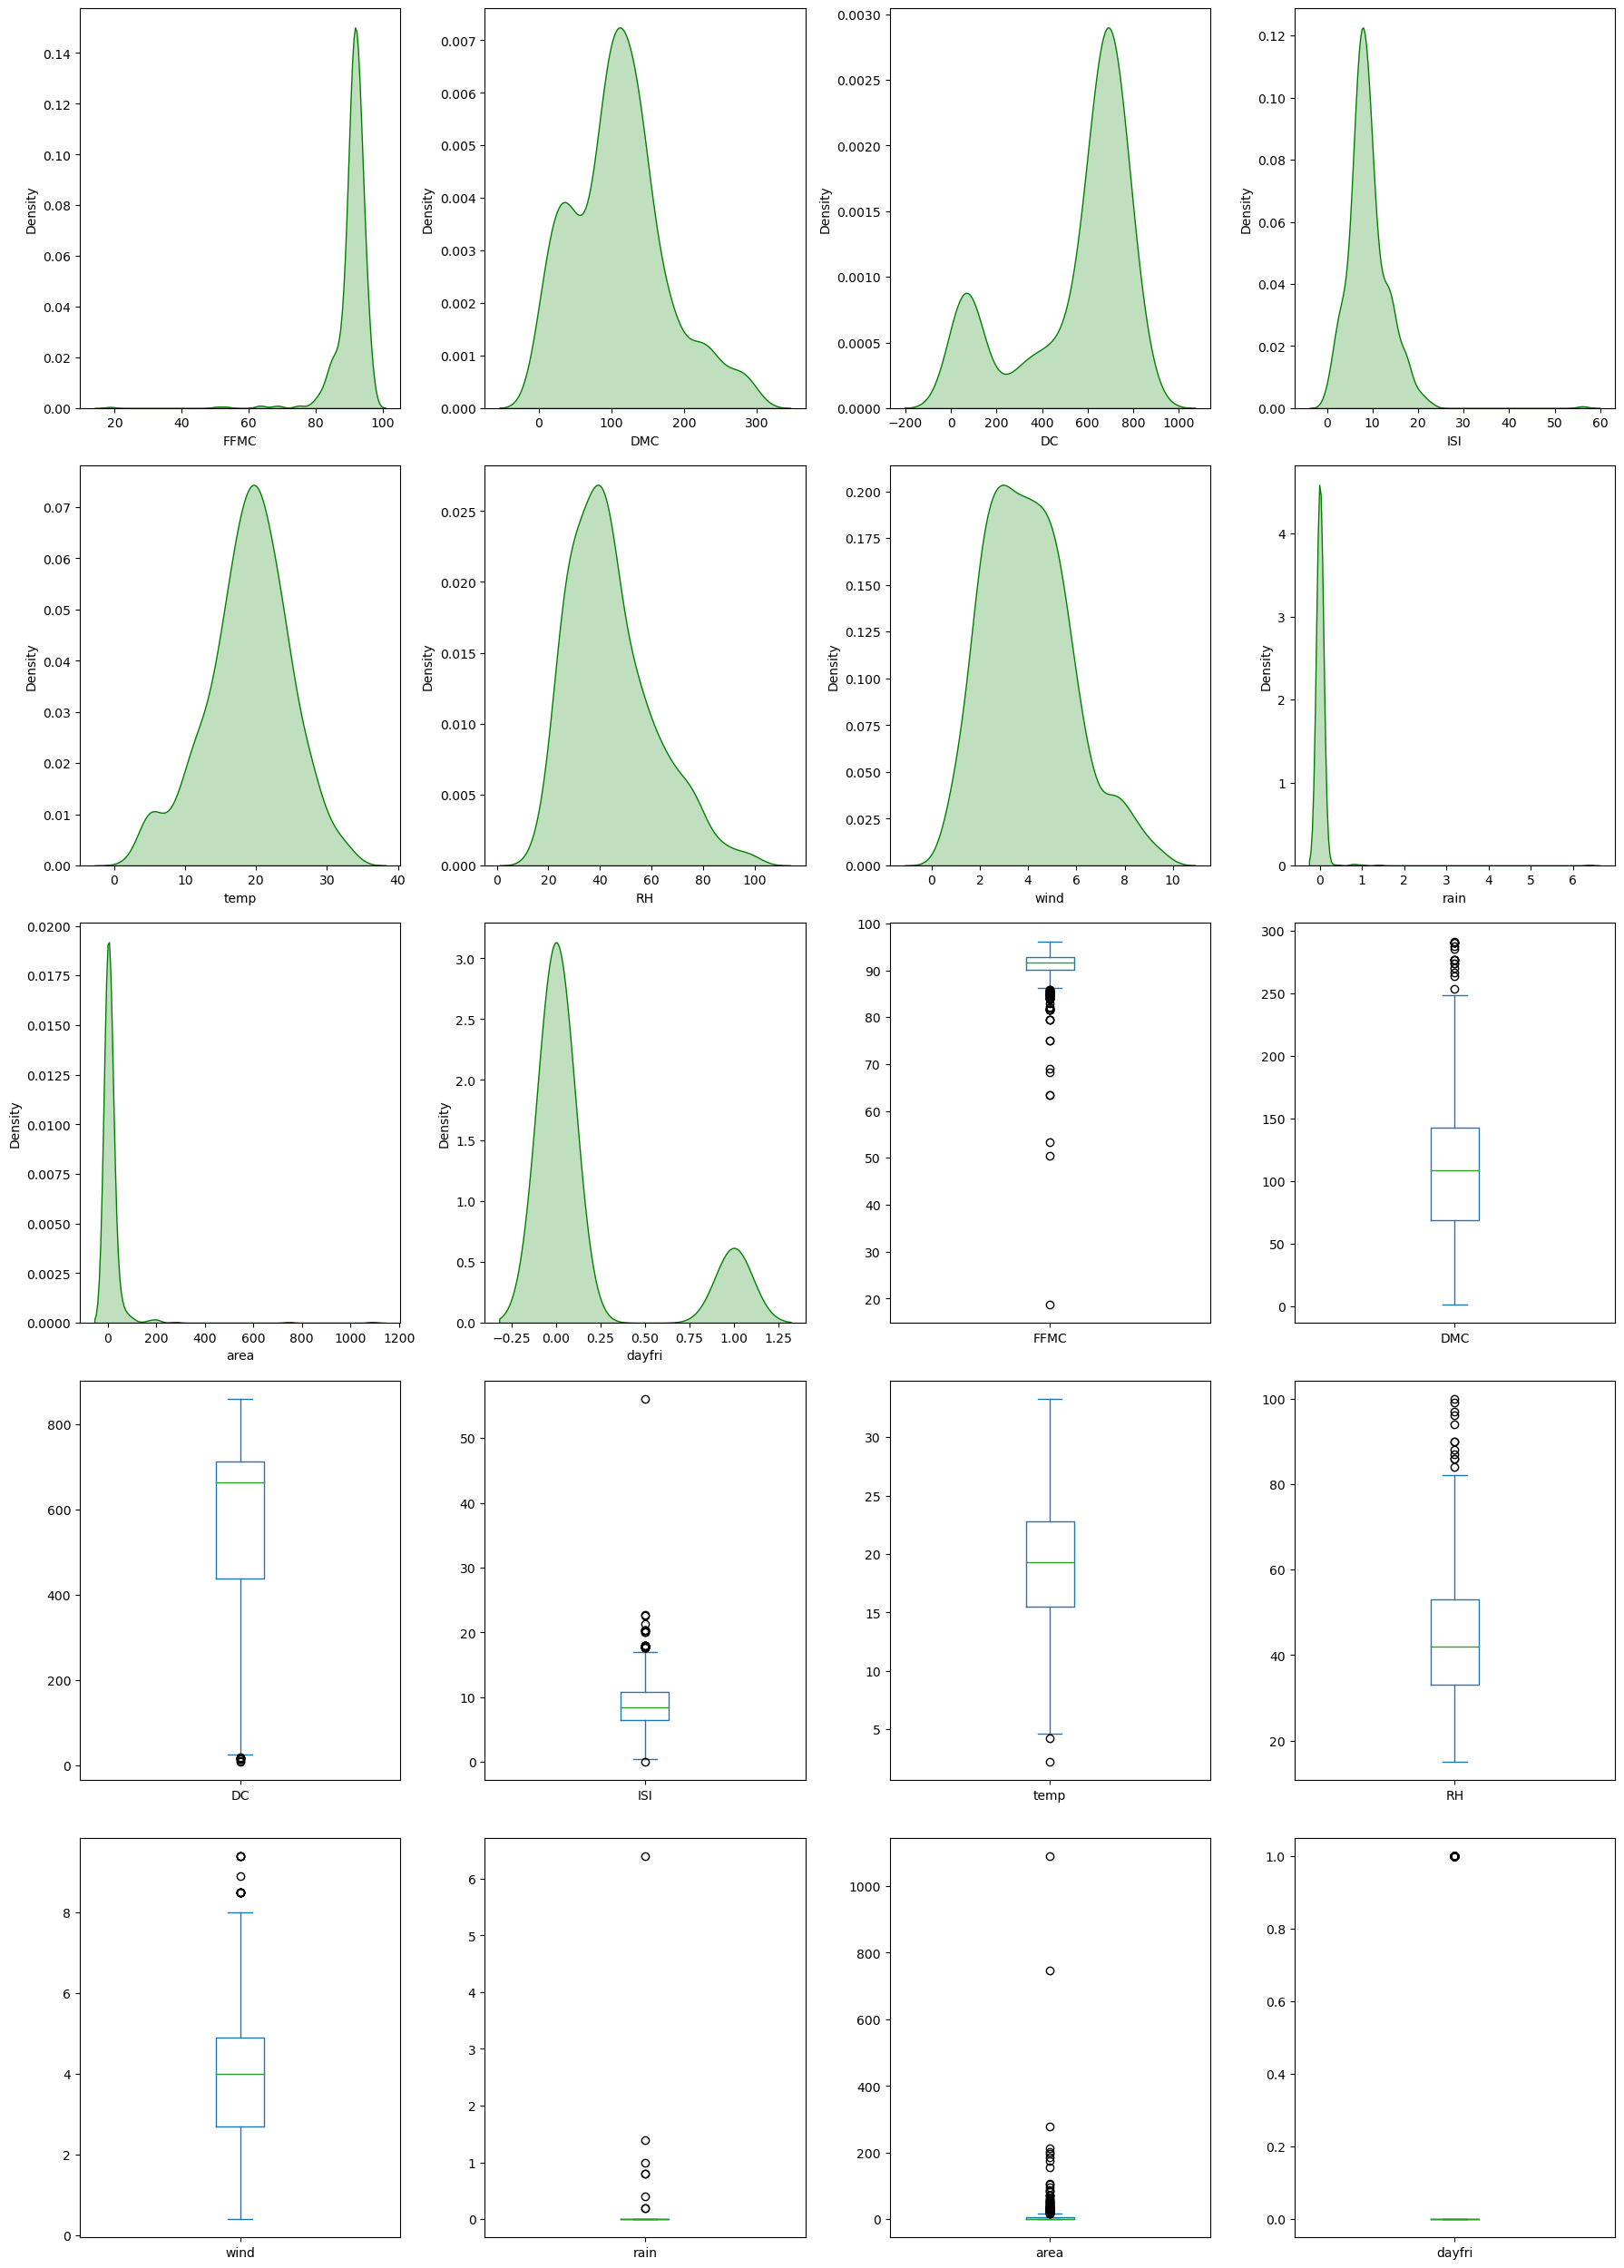

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri
skewness,-6.575606,0.547498,-1.100445,2.536325,-0.331172,0.862904,0.571001,19.816344,12.846934,1.816105
kurtosis,67.066041,0.204822,-0.245244,21.458037,0.136166,0.438183,0.054324,421.295964,194.140721,1.303265


In [17]:
plt.figure(figsize=(18,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(df[col],color='g',shade=True)
    plt.subplot(8,4,i+10)
    df[col].plot.box()
plt.tight_layout() 
plt.show()
num_data = df[num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])

In [18]:
### Finding Correlation 

In [19]:
corr = df1[df1.columns[0:11]].corr()

<AxesSubplot:>

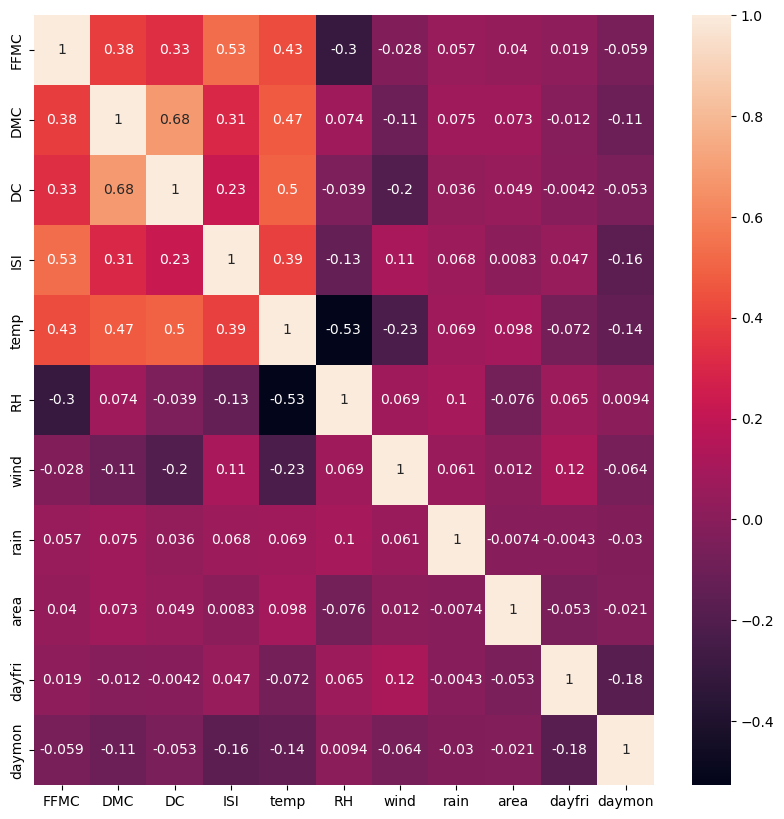

In [20]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

In [21]:
##### Neural Network Model

In [22]:
mapping = {'small': 1, 'large': 2}

In [23]:
df1 = df1.replace(mapping)

In [24]:
X = np.array(df1.iloc[:,0:28])
y = np.array(df1.iloc[:,28])

In [29]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [30]:
X_norm = norm_func(X)

In [31]:
x_train,x_test,y_train,y_test= train_test_split(X_norm,y, test_size=0.2,stratify = y)

In [32]:
model = Sequential()
model.add(Dense(12, input_dim=28, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [33]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [34]:
model.fit(x_train, y_train, epochs=150, batch_size=10)

Epoch 1/150
42/42 [==============================] - 1s 1ms/step - loss: 0.6769 - accuracy: 0.4334
Epoch 2/150
42/42 [==============================] - 0s 2ms/step - loss: 0.5107 - accuracy: 0.7312
Epoch 3/150
42/42 [==============================] - 0s 1ms/step - loss: 0.3435 - accuracy: 0.7312
Epoch 4/150
42/42 [==============================] - 0s 2ms/step - loss: 0.1007 - accuracy: 0.7312
Epoch 5/150
42/42 [==============================] - 0s 2ms/step - loss: -0.1703 - accuracy: 0.7312
Epoch 6/150
42/42 [==============================] - 0s 2ms/step - loss: -0.4652 - accuracy: 0.7312
Epoch 7/150
42/42 [==============================] - 0s 2ms/step - loss: -0.7903 - accuracy: 0.7312
Epoch 8/150
42/42 [==============================] - 0s 2ms/step - loss: -1.1509 - accuracy: 0.7312
Epoch 9/150
42/42 [==============================] - 0s 2ms/step - loss: -1.5904 - accuracy: 0.7312
Epoch 10/150
42/42 [==============================] - 0s 2ms/step - loss: -2.1347 - accuracy: 0.7312
Epo

42/42 [==============================] - 0s 2ms/step - loss: -1143.8474 - accuracy: 0.7312
Epoch 82/150
42/42 [==============================] - 0s 2ms/step - loss: -1180.2516 - accuracy: 0.7312
Epoch 83/150
42/42 [==============================] - 0s 2ms/step - loss: -1216.8137 - accuracy: 0.7312
Epoch 84/150
42/42 [==============================] - 0s 2ms/step - loss: -1254.7567 - accuracy: 0.7312
Epoch 85/150
42/42 [==============================] - 0s 2ms/step - loss: -1291.9115 - accuracy: 0.7312
Epoch 86/150
42/42 [==============================] - 0s 2ms/step - loss: -1331.8860 - accuracy: 0.7312
Epoch 87/150
42/42 [==============================] - 0s 2ms/step - loss: -1370.5646 - accuracy: 0.7312
Epoch 88/150
42/42 [==============================] - 0s 1ms/step - loss: -1412.2507 - accuracy: 0.7312
Epoch 89/150
42/42 [==============================] - 0s 1ms/step - loss: -1452.7064 - accuracy: 0.7312
Epoch 90/150
42/42 [==============================] - 0s 1ms/step - loss: -14

In [36]:
_, accuracy = model.evaluate(x_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))

13/13 [==============================] - 0s 1ms/step - loss: -5362.2925 - accuracy: 0.7312
Accuracy: 73.12
